# INF 2178 Final Submission 
# Kamilah Ebrahim 

Update your midterm analysis with the feedback received.
Add a ANCOVA analysis.
Explore a power analysis universe given a variety of effect sizes, Type II error and sample sizes for this dataset. Comment critically on this in your writeup.
I am more concerned with your process than than specific right outcomes (though of course, they are secondarily important)
Write up: Add to your prior writeup with a critical commentary of the newer analysis added.


# Workplace Setup and Data Import

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
from scipy import stats

In [5]:
!pip install inflection
import inflection


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
import scipy.stats as stats


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels as sm
from statsmodels.formula.api import ols


from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

In [9]:

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [10]:
import statsmodels.api as sm

In [11]:
!pip install pingouin
from pingouin import ancova

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [14]:
print("done")

done


# 1. Clean Dataset Using Tidy Data Principles 
Code Adapted From: 
INF 2178 Class notes/github and 
https://realpython.com/python-data-cleaning-numpy-pandas/#dropping-columns-in-a-dataframe and 
https://www.kaggle.com/code/dylanyves/diabetes-prediction-detailed-beginner-notebook

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
print(f'Total na values\n\n{df.isna().sum()}')

Total na values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(f'Total duplicated data: {df.duplicated().sum()}')

Total duplicated data: 0


In [ ]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [ ]:
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean()).astype(int)
df.Insulin.value_counts()

79     376
105     11
130      9
140      9
120      8
      ... 
171      1
255      1
52       1
68       1
112      1
Name: Insulin, Length: 185, dtype: int64

In [ ]:
#creating a subsample with the first 100 entries

df_subsample = df.drop(df.index[100:])
df_subsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   pregnancies                 100 non-null    int64   
 1   glucose                     100 non-null    int64   
 2   blood_pressure              100 non-null    int64   
 3   skin_thickness              100 non-null    int64   
 4   insulin                     100 non-null    int64   
 5   bmi                         100 non-null    float64 
 6   diabetes_pedigree_function  100 non-null    float64 
 7   age                         100 non-null    int64   
 8   outcome                     100 non-null    int64   
 9   NewGlucose                  2 non-null      category
dtypes: category(1), float64(2), int64(7)
memory usage: 8.0 KB


In [ ]:
#creating a subsample with the first 500 entries

df_subsample2 = df.drop(df.index[500:])
df_subsample2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


# 2. EDA, Visualizations

These boxplots help to better understand the data overall and the relationships between the variables and the outcome, and are an important initial step in the EDA process. 

In [ ]:
fig = make_subplots(cols=4, rows=2, subplot_titles=(df.columns))

fig.add_trace(go.Box(x=df.Pregnancies), row=1, col=1)
fig.add_trace(go.Box(x=df.Glucose), row=1, col=2)
fig.add_trace(go.Box(x=df.BloodPressure), row=1, col=3)
fig.add_trace(go.Box(x=df.SkinThickness), row=1, col=4)

fig.add_trace(go.Box(x=df.Insulin), row=2, col=1)
fig.add_trace(go.Box(x=df.BMI), row=2, col=2)
fig.add_trace(go.Box(x=df.DiabetesPedigreeFunction), row=2, col=3)
fig.add_trace(go.Box(x=df.Age), row=2, col=4)

In [ ]:
column_list = list(df.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(col)

df.columns = column_list

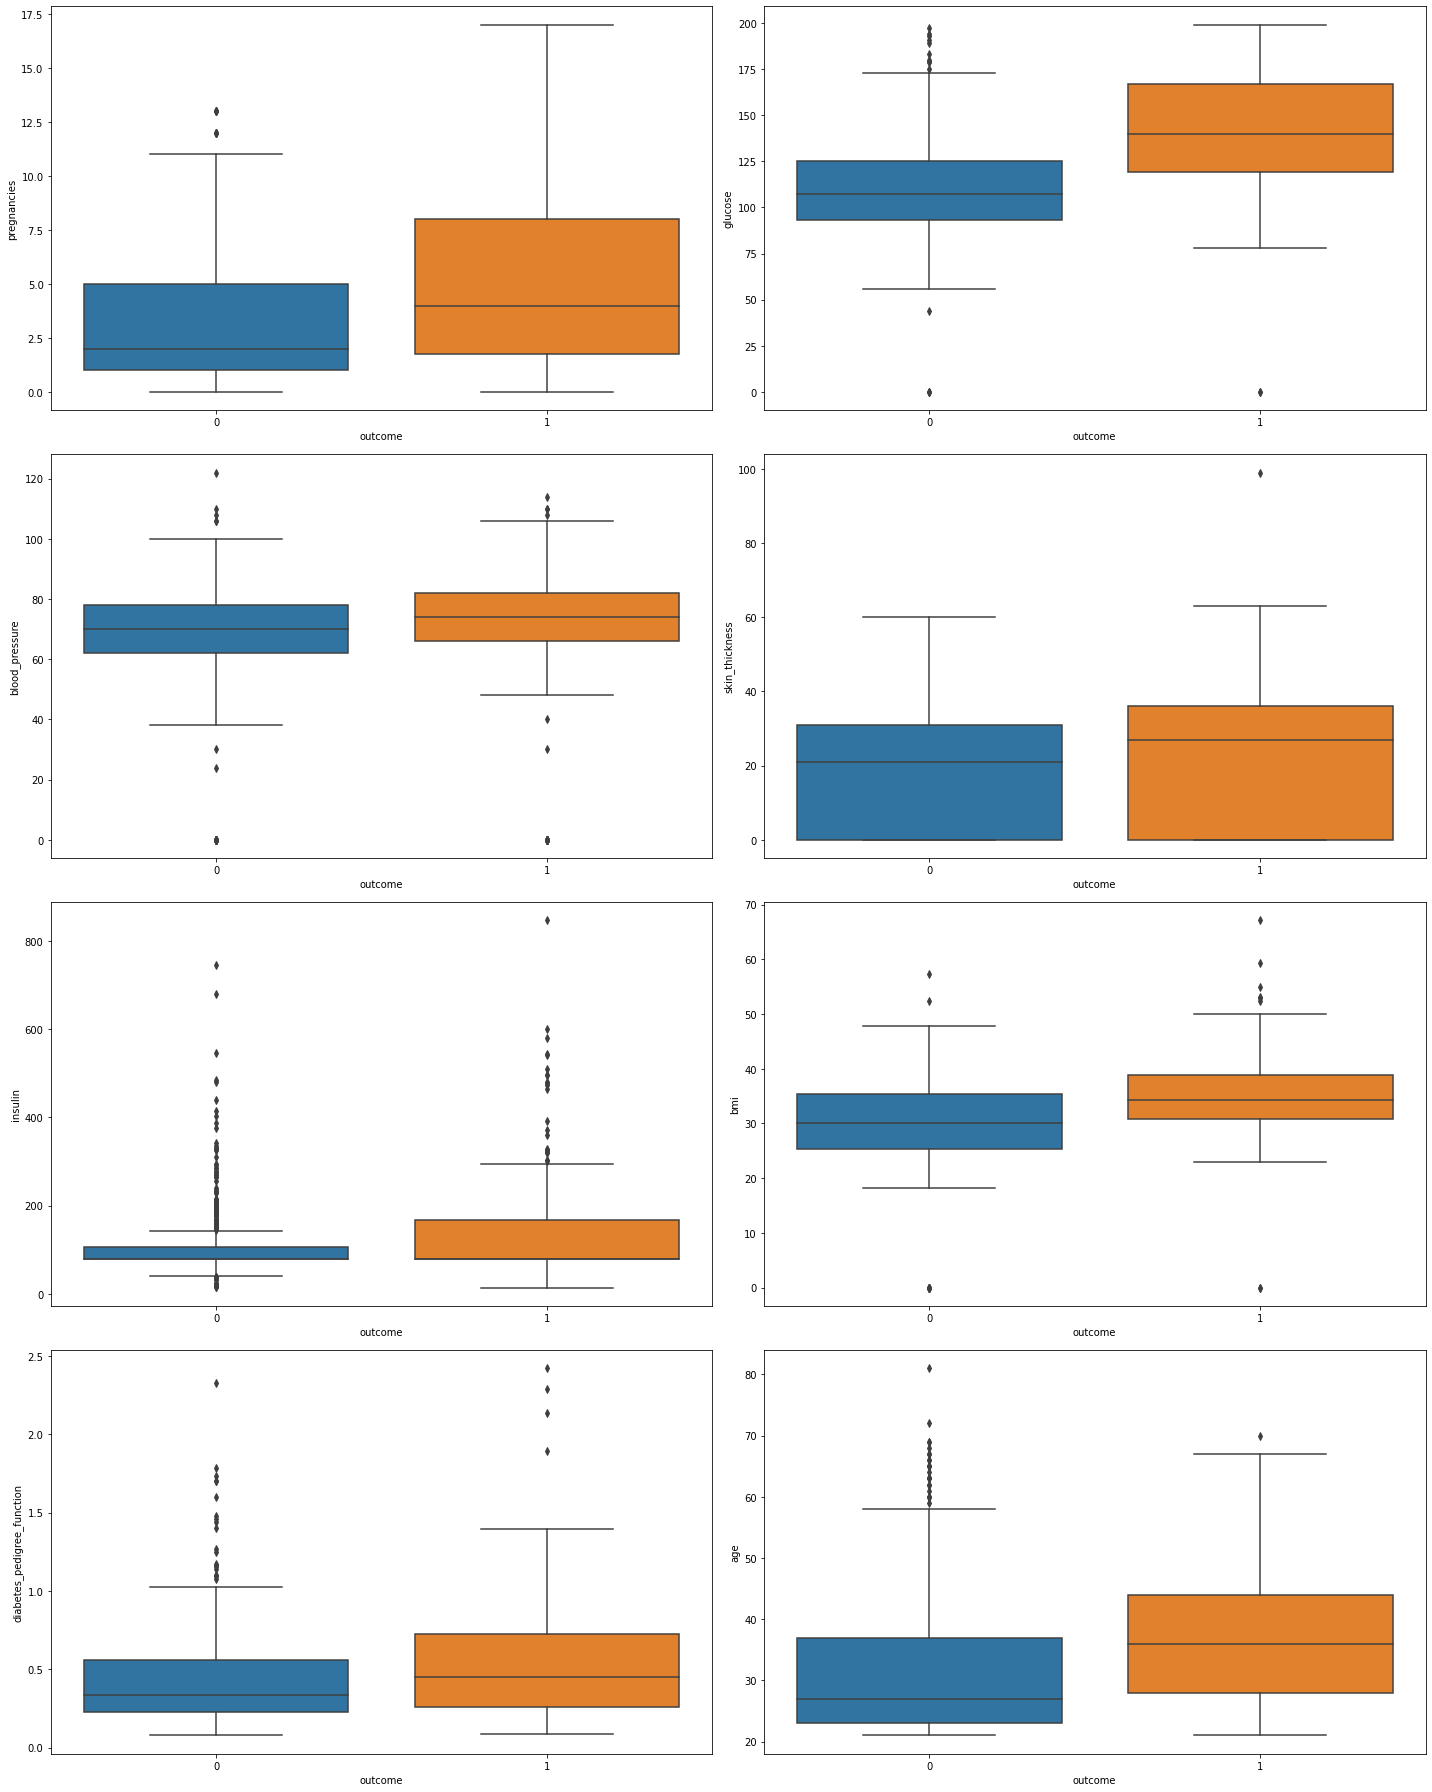

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,25))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[:-1]):
  sns.boxplot(data=df, x='outcome', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

EDA: heatmap to see which variables are most correlated with one another 
It appears as though Glucose, BMI, and Age are the most correlated with the Outcome variable. This is an important finding and will help inform the research questions in this section. 

In [ ]:
corr = df.corr()
fig = px.imshow(corr)
fig.show()

Now I will plot the variables most correlated with the Outcome variable with each other to further investigate their relationship. 

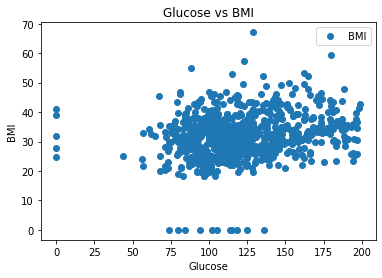

In [ ]:
df.plot(x='Glucose', y='BMI', style='o')
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [ ]:
df.plot(x='Glucose', y='Age', style='o')
plt.title('Glucose vs Age')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

KeyError: ignored

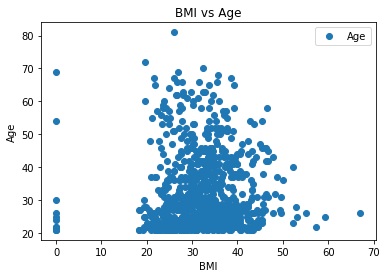

In [ ]:
df.plot(x='BMI', y='Age', style='o')
plt.title('BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead

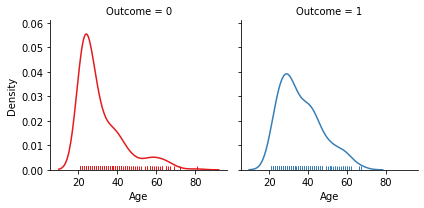

In [ ]:
age_dist = df_subsample2[["Age", "Outcome"]]

g = sns.FacetGrid(data=age_dist, col = "Outcome", hue="Outcome", palette="Set1")
g = (g.map(sns.distplot, "Age", hist=False, rug=True))

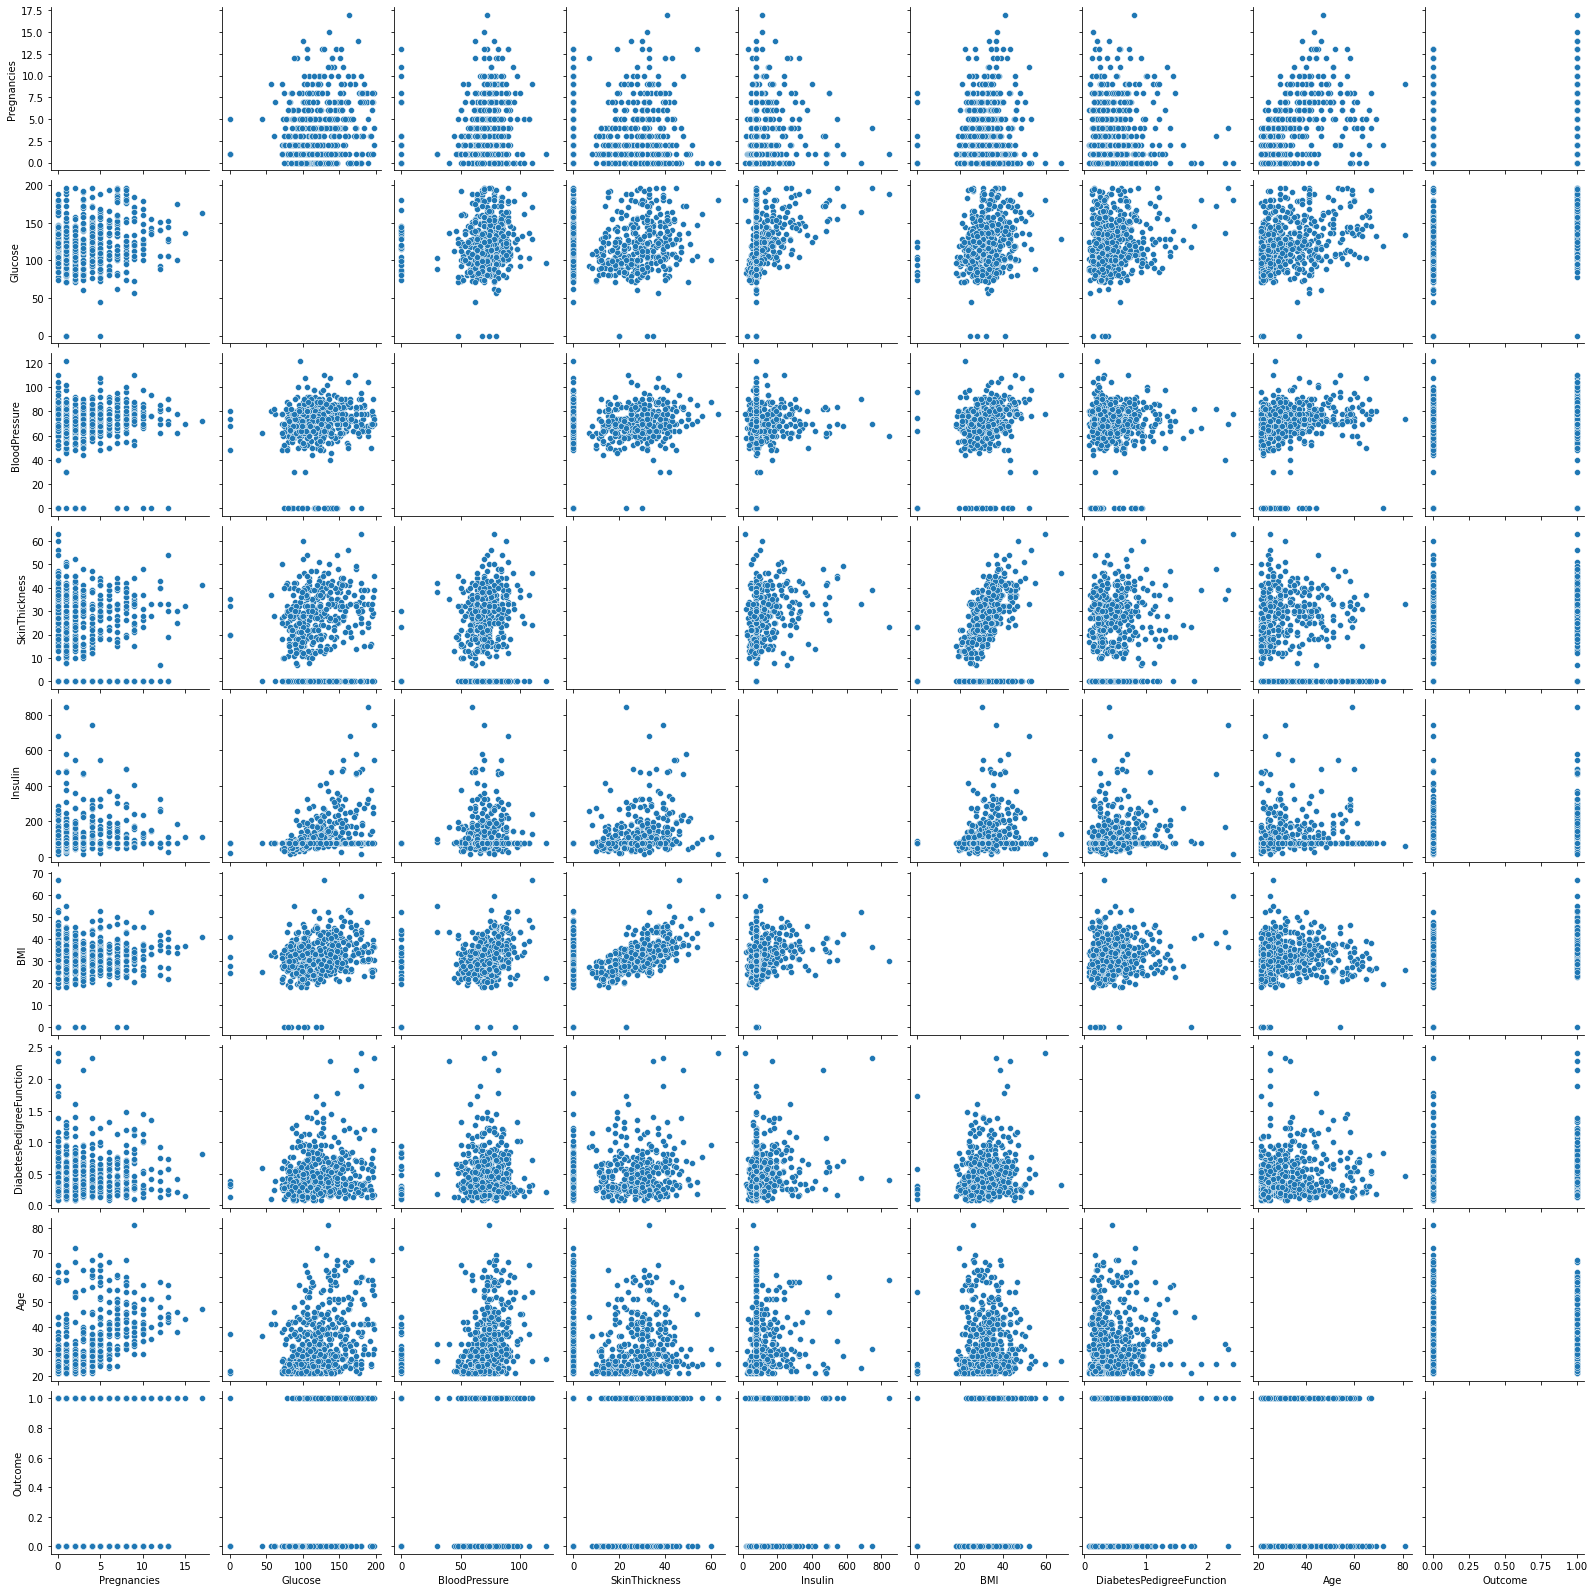

In [ ]:
g = sns.pairplot(df_subsample2, diag_kind="reg")

# T-Tests

At this point, my understanding of the data is grounded enough to form research questions: 

1) Can a diabetes outcome be explained by Glucose levels? 
2) Can a diabetes outcome be explained by BMI?

In [13]:
NewGlucose = pd.Series(["Low", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 125, "NewGlucose"] = NewGlucose[0]

df.loc[df["Glucose"] > 124, "NewGlucose"] = NewGlucose[1]

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Outcome ~ NewGlucose',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df          F        PR(>F)
NewGlucose   29.970467    1.0  158.86502  3.098368e-33
Residual    144.508700  766.0        NaN           NaN


In [15]:

pair_t = mod.t_test_pairwise('NewGlucose')
pair_t.result_frame

coef   std err          t         P>|t|  Conf. Int. Low  \
Low-High -0.402429  0.031928 -12.604167  3.098368e-33       -0.465106   

          Conf. Int. Upp.     pvalue-hs  reject-hs  
Low-High        -0.339752  3.098368e-33       True

In [16]:
NewBMI = pd.Series(["Low", "High"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] <= 30, "NewBMI"] = NewBMI[0]

df.loc[df["BMI"] > 29, "NewBMI"] = NewBMI[1]

In [17]:
mod = ols('Outcome ~ NewBMI',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df          F        PR(>F)
NewBMI     15.265903    1.0  73.446655  5.665584e-17
Residual  159.213264  766.0        NaN           NaN


In [18]:
pair_t = mod.t_test_pairwise('NewBMI')
pair_t.result_frame

coef   std err         t         P>|t|  Conf. Int. Low  \
Low-High -0.296575  0.034606 -8.570102  5.665584e-17       -0.364509   

          Conf. Int. Upp.     pvalue-hs  reject-hs  
Low-High        -0.228642  5.665584e-17       True

In [19]:
# parameters for the analysis 
effect_size = 0.5
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 63.77


# Power Analysis

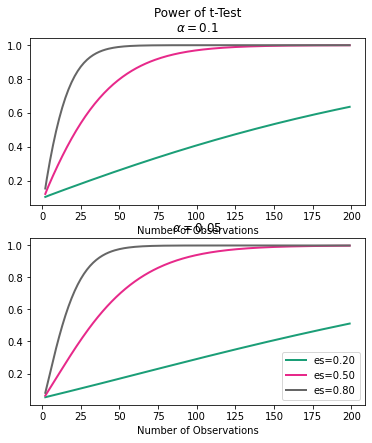

In [21]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.1,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.1$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

# Linear Regression and Anova Modelling

In [23]:
# test all the variables as explanatory variables

model1 = ols('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age', df).fit()
table1 = sm.stats.anova_lm(model1, type=2)
table1

df      sum_sq    mean_sq           F  \
Pregnancies                 1.0    8.591143   8.591143   53.638189   
Glucose                     1.0   34.020758  34.020758  212.406175   
BloodPressure               1.0    0.123476   0.123476    0.770911   
SkinThickness               1.0    0.863789   0.863789    5.393003   
Insulin                     1.0    0.255349   0.255349    1.594251   
BMI                         1.0    6.780158   6.780158   42.331432   
DiabetesPedigreeFunction    1.0    1.817752   1.817752   11.349002   
Age                         1.0    0.458924   0.458924    2.865257   
Residual                  759.0  121.567819   0.160168         NaN   

                                PR(>F)  
Pregnancies               6.164705e-13  
Glucose                   1.327103e-42  
BloodPressure             3.802132e-01  
SkinThickness             2.048132e-02  
Insulin                   2.071077e-01  
BMI                       1.398272e-10  
DiabetesPedigreeFunction  7.929848e-04  
Age                       9.092163e-02  
Residual                           NaN

In [24]:
df1 = table1[table1['PR(>F)'] < 0.05]

df1

df     sum_sq    mean_sq           F        PR(>F)
Pregnancies               1.0   8.591143   8.591143   53.638189  6.164705e-13
Glucose                   1.0  34.020758  34.020758  212.406175  1.327103e-42
SkinThickness             1.0   0.863789   0.863789    5.393003  2.048132e-02
BMI                       1.0   6.780158   6.780158   42.331432  1.398272e-10
DiabetesPedigreeFunction  1.0   1.817752   1.817752   11.349002  7.929848e-04

In [25]:
# test the variables of interest as explanatory variables

model2 = ols('Outcome ~ Glucose+BMI+Age', df).fit()
table2 = sm.stats.anova_lm(model2, type=2)
table2

df      sum_sq    mean_sq           F        PR(>F)
Glucose     1.0   37.983801  37.983801  228.119379  2.702802e-45
BMI         1.0    6.590809   6.590809   39.582431  5.293274e-10
Age         1.0    2.692113   2.692113   16.168030  6.371564e-05
Residual  764.0  127.212444   0.166508         NaN           NaN

In [26]:
df2 = table2[table2['PR(>F)'] < 0.05]
df2

df     sum_sq    mean_sq           F        PR(>F)
Glucose  1.0  37.983801  37.983801  228.119379  2.702802e-45
BMI      1.0   6.590809   6.590809   39.582431  5.293274e-10
Age      1.0   2.692113   2.692113   16.168030  6.371564e-05

In [20]:
ancova(data=df, dv='Glucose', covar='Age', between='BMI')

Source             SS   DF          F         p-unc       np2
0       BMI  269180.498425  247   1.228407  2.773975e-02  0.368933
1       Age   52137.876886    1  58.769081  8.791544e-14  0.101717
2  Residual  460438.682069  519        NaN           NaN       NaN

In [2]:
from statsmodels.formula.api import ols


anova1 = ols(
    'Outcome ~ C(Glucose) + C(BMI) +\
    C(Glucose):C(BMI)', data=df).fit()
anova1 = sm.stats.anova_lm(anova, type = 2)
  
print(anova1)

NameError: ignored